In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b

os.sys.path.append("C:/Users/mplitt/dPCA-master/python/")
from dPCA import dPCA

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# load session
mouse = '4139265.3'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1403,4139265.3,10_02_2019,1,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...
1405,4139265.3,10_02_2019,3,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.3\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\10_02_2...
1433,4139265.3,12_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.3\12_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\12_02_2...
1455,4139265.3,15_02_2019,4,TwoTower_foraging,72,1,CA1,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.3\15_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\15_02_2...
1475,4139265.3,17_02_2019,2,TwoTower_foraging,81,1,CA1,2019-02-17,G:\My Drive\VR_Data\TwoTower\4139265.3\17_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\17_02_2...
1495,4139265.3,19_02_2019,2,TwoTower_foraging,92,1,CA1,2019-02-19,G:\My Drive\VR_Data\TwoTower\4139265.3\19_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\19_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\19_02_2...
1513,4139265.3,21_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-21,G:\My Drive\VR_Data\TwoTower\4139265.3\21_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\21_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\21_02_2...
1522,4139265.3,22_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-22,G:\My Drive\VR_Data\TwoTower\4139265.3\22_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\22_02_2...
1531,4139265.3,23_02_2019,2,TwoTower_foraging,93,1,CA1,2019-02-23,G:\My Drive\VR_Data\TwoTower\4139265.3\23_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\23_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\23_02_2...
1537,4139265.3,24_02_2019,2,TwoTower_foraging,97,1,CA1,2019-02-24,G:\My Drive\VR_Data\TwoTower\4139265.3\24_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.3\24_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.3\24_02_2...


In [26]:
sess = df_mouse.iloc[-1]
print(sess['data file'])

G:\My Drive\VR_Data\TwoTower\4139265.3\24_02_2019\TwoTower_foraging_2.sqlite


In [27]:
VRDat,C, S, A = pp.load_scan_sess(sess)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
S_avgMat,labels = u.across_trial_avg(S_trial_mat,trial_info['morphs'])
S_avgMat= S_avgMat[[0,-1],:,:]

num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0


In [28]:
print(S_avgMat.shape)
print(labels)

(2, 90, 1634)
[0.   0.25 0.5  0.75 1.  ]


In [29]:
d= dPCA.dPCA(labels='pm')

In [30]:
d.fit(S_avgMat.T)

dPCA(copy=True, join=None, labels='pm', n_components=10, n_iter=0,
   regularizer=0)

In [31]:
S_d = d.transform(S_avgMat.T)


In [32]:
print(d.explained_variance_ratio_)

{'p': [0.0372189066283336, 0.03568158820169992, 0.03078585654334378, 0.023357851729531198, 0.020174844205773212, 0.014478944449235389, 0.011496828408490674, 0.008960272280633699, 0.00840336507033504, 0.006444420426620264], 'm': [0.023479701108088943, 3.3901768239540233e-09, 2.6202486970012353e-09, 1.9234846394346978e-09, 1.7674212805318471e-09, 1.0807479009889306e-09, 8.320434961571734e-10, 6.570562281874613e-10, 5.444273524360179e-10, 3.825609528395346e-10], 'pm': [0.028236451482515287, 0.026029333396339893, 0.025200945402720942, 0.017150484431390986, 0.014282138960062786, 0.014024107986194589, 0.010061197261359744, 0.008297627289361864, 0.008121040517221246, 0.006088867429332934]}


In [33]:
S_d['p'].shape

(10, 90, 2)

0
1


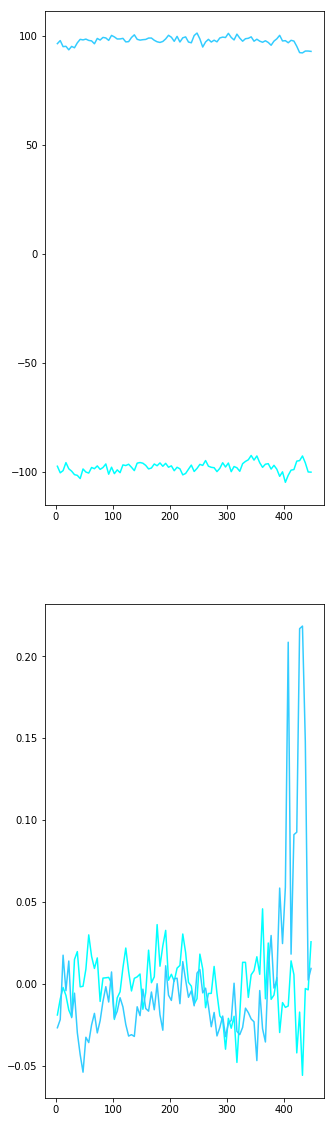

In [34]:
f,ax = plt.subplots(2,1,figsize=[5,20])
for i in range(2):
    print(i)
    for j in range(2):
        ax[j].plot(centers,S_d['m'][j,:,i],color=plt.cm.cool(i/np.float(5)))

In [35]:
print(d.D['m'].shape)

(1634, 10)


In [36]:
mask = VRDat.pos._values>0
Maxis = np.matmul(S[:,:],d.D['m'])
PMaxis = np.matmul(S[:,:],d.D['pm'])
Paxis = np.matmul(S[:,:],d.D['p'])

In [37]:
print(Maxis.shape)

(32038, 10)


In [38]:
Marr,occ,edges,centers = u.make_pos_bin_trial_matrices(Maxis,VRDat.pos._values,tstart_inds,teleport_inds)
PMarr,occ,edges,centers = u.make_pos_bin_trial_matrices(PMaxis,VRDat.pos._values,tstart_inds,teleport_inds)

In [39]:
Mavg, l = u.across_trial_avg(Marr,trial_info['morphs'])
PMavg, l = u.across_trial_avg(PMarr,trial_info['morphs'])

(5, 90, 10)


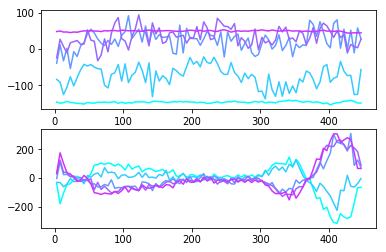

In [40]:
print(Mavg.shape)
f,ax = plt.subplots(2,1)

for i in range(5):
    ax[0].plot(centers,Mavg[i,:,0],color=plt.cm.cool(i/5.))
    ax[1].plot(centers,PMavg[i,:,0],color=plt.cm.cool(i/5.))

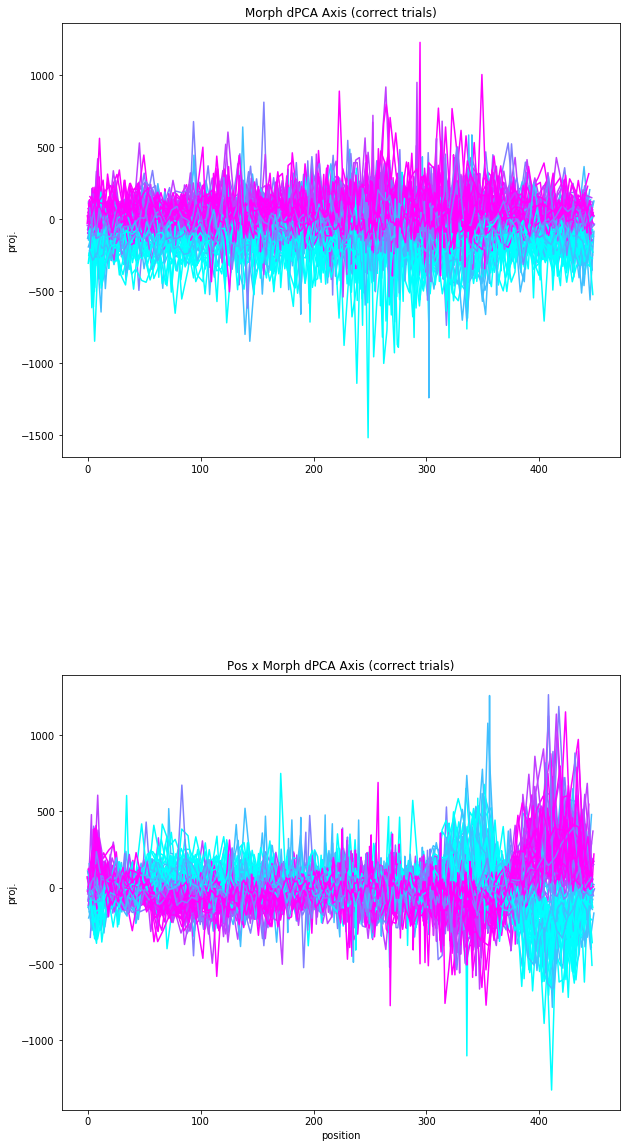

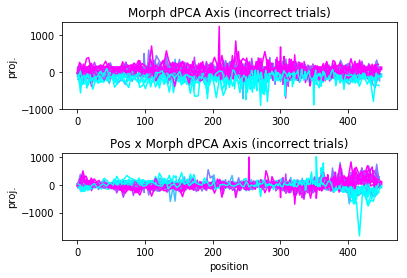

In [41]:
f,ax = plt.subplots(2,1,figsize=[10,20])

ff,aax = plt.subplots(2,1)

# fff,aaax = plt.subplots()

Msmooth = sp.ndimage.filters.gaussian_filter(Maxis,(0,0))
PMsmooth = sp.ndimage.filters.gaussian_filter(PMaxis,(0,0))
Psmooth = sp.ndimage.filters.gaussian_filter(Paxis,(0,0))

aax[0].plot(centers,S_d['m'][0,:,0],color = plt.cm.cool(0.),linewidth=4)
aax[0].plot(centers,S_d['m'][0,:,-1],color = plt.cm.cool(1.),linewidth=4)

aax[1].plot(centers,S_d['pm'][0,:,0],color = plt.cm.cool(0.),linewidth=4)
aax[1].plot(centers,S_d['pm'][0,:,-1],color = plt.cm.cool(1.),linewidth=4)
for trial in range(0,S_trial_mat.shape[0]):
#     print(tstart_inds[trial],teleport_inds[trial])
#     print(VRDat.pos._values[tstart_inds[trial]],VRDat.pos._values[teleport_inds[trial]])
     
#     aaax.plot(VRDat.pos._values[tstart_inds[trial]:teleport_inds[trial]-1],Psmooth[tstart_inds[trial]:teleport_inds[trial]-1,3],color= plt.cm.cool(trial_info['morphs'][trial]))
    
    if trial_info['rewards'][trial]>0:
#         ax[0].plot(Msmooth[tstart_inds[trial]:teleport_inds[trial]-1,1],Msmooth[tstart_inds[trial]:teleport_inds[trial]-1,0],color= plt.cm.cool(trial_info['morphs'][trial]))
        ax[0].plot(VRDat.pos._values[tstart_inds[trial]:teleport_inds[trial]-1],Msmooth[tstart_inds[trial]:teleport_inds[trial]-1,0],color= plt.cm.cool(trial_info['morphs'][trial]))
#         ax[1].plot(PMsmooth[tstart_inds[trial]:teleport_inds[trial]-1,1],PMsmooth[tstart_inds[trial]:teleport_inds[trial]-1,0],color= plt.cm.cool(trial_info['morphs'][trial]))
        ax[1].plot(VRDat.pos._values[tstart_inds[trial]:teleport_inds[trial]-1],PMsmooth[tstart_inds[trial]:teleport_inds[trial]-1,0],color= plt.cm.cool(trial_info['morphs'][trial]))
    else:
        aax[0].plot(VRDat.pos._values[tstart_inds[trial]:teleport_inds[trial]-1],Msmooth[tstart_inds[trial]:teleport_inds[trial]-1,0],color= plt.cm.cool(trial_info['morphs'][trial]))
        aax[1].plot(VRDat.pos._values[tstart_inds[trial]:teleport_inds[trial]-1],PMsmooth[tstart_inds[trial]:teleport_inds[trial]-1,0],color= plt.cm.cool(trial_info['morphs'][trial]))



# ax[0].set_xlabel('position')
ax[0].set_ylabel('proj.')
ax[0].set_title('Morph dPCA Axis (correct trials)')

ax[1].set_xlabel('position')
ax[1].set_ylabel('proj.')
ax[1].set_title('Pos x Morph dPCA Axis (correct trials)')
f.subplots_adjust(hspace=.5)

# f.savefig('CorrectTrials_debug.pdf',format='pdf')


# aax[0].set_xlabel('position')
aax[0].set_ylabel('proj.')
aax[0].set_title('Morph dPCA Axis (incorrect trials)')

aax[1].set_xlabel('position')
aax[1].set_ylabel('proj.')
aax[1].set_title('Pos x Morph dPCA Axis (incorrect trials)')
ff.subplots_adjust(hspace=.5)

# ff.savefig('IncorrectTrials_debug.pdf',format='pdf')

In [42]:
import sklearn.decomposition
from sklearn.decomposition import PCA as PCA

In [43]:
pca = PCA()
Ssmooth = sp.ndimage.filters.gaussian_filter(S,(10,0))
S_pca = pca.fit_transform(Ssmooth[mask,:])

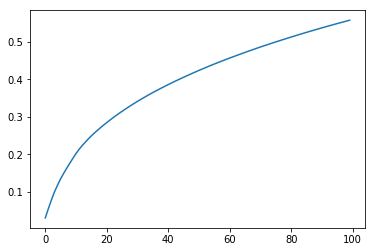

In [44]:
f,ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_[:100]))

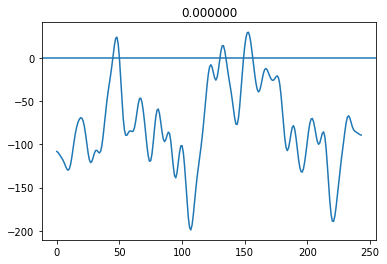

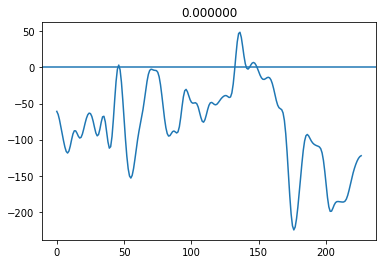

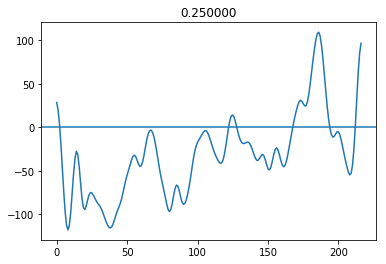

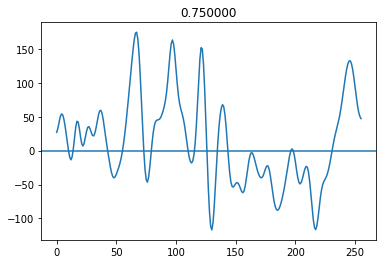

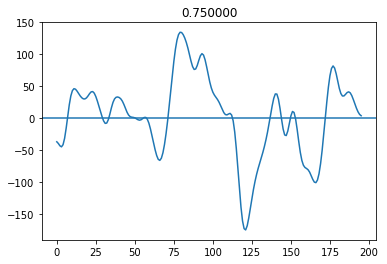

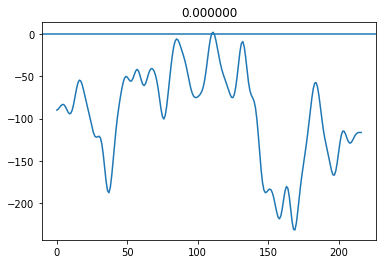

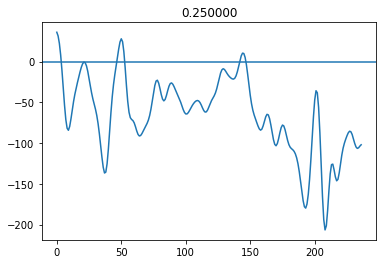

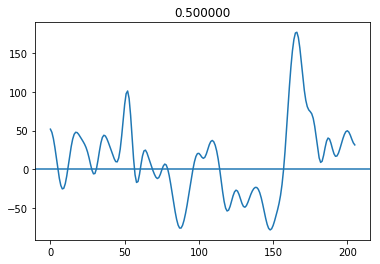

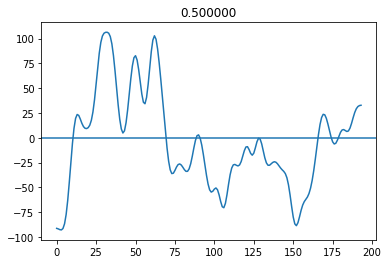

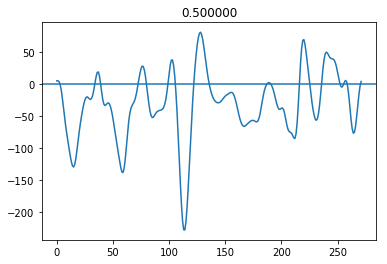

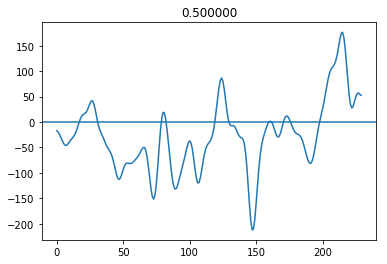

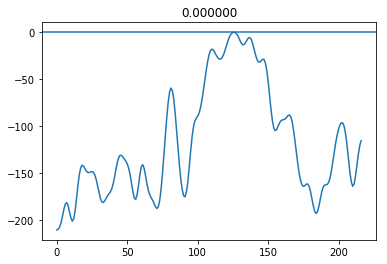

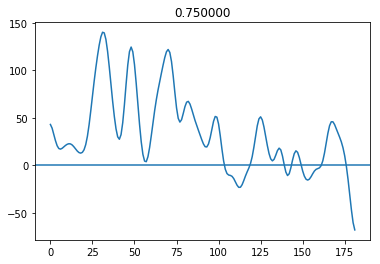

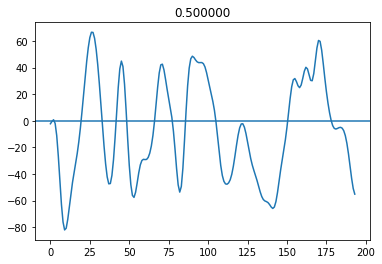

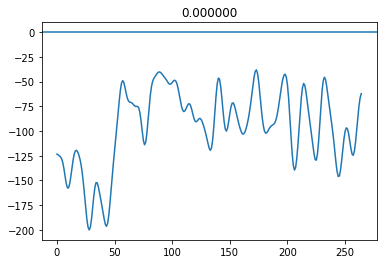

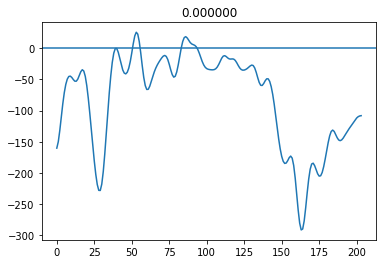

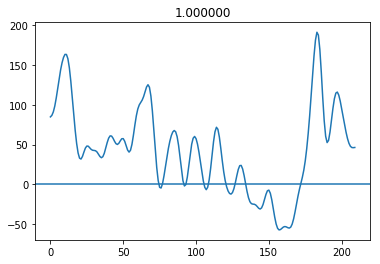

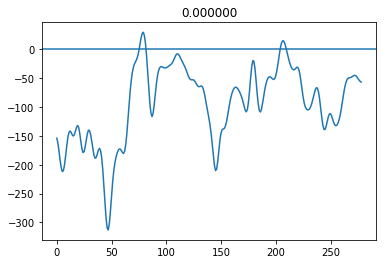

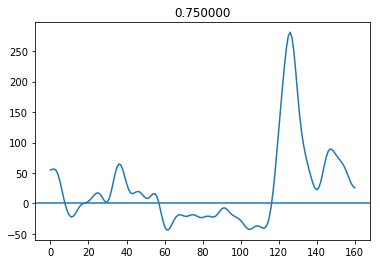

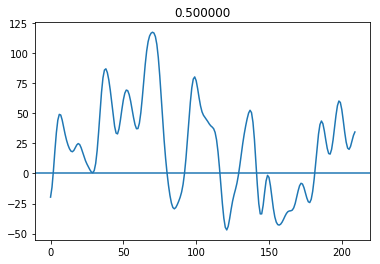

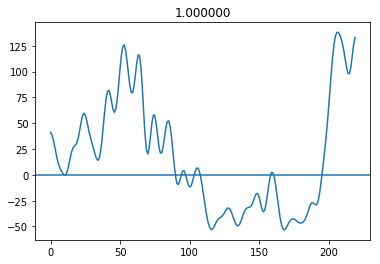

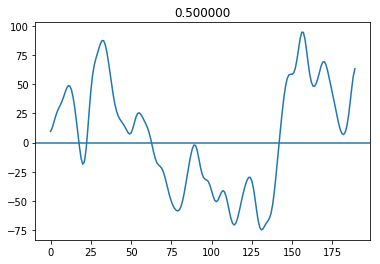

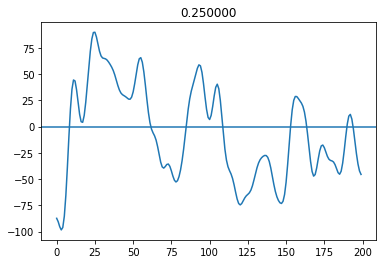

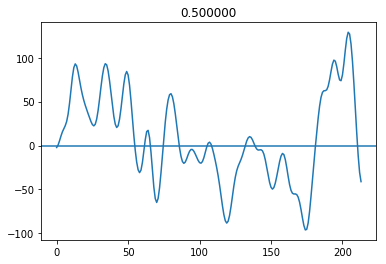

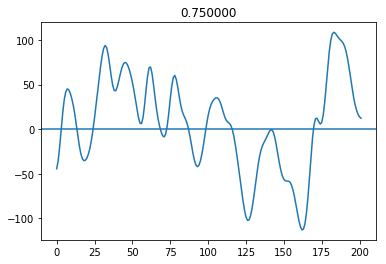

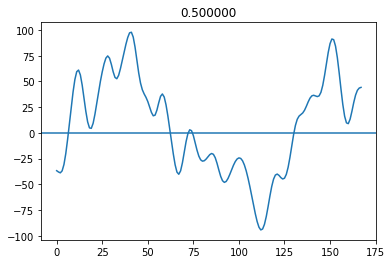

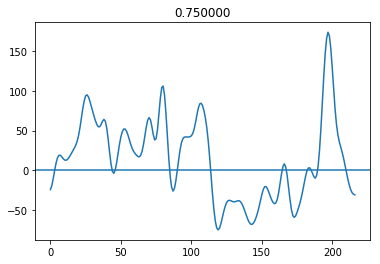

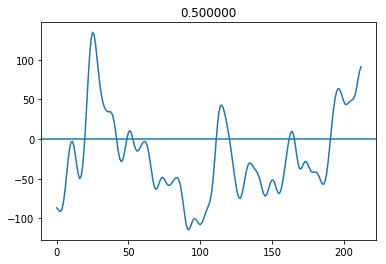

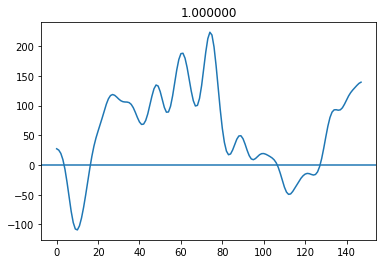

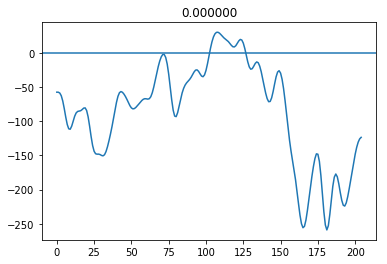

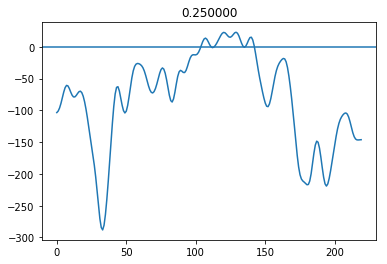

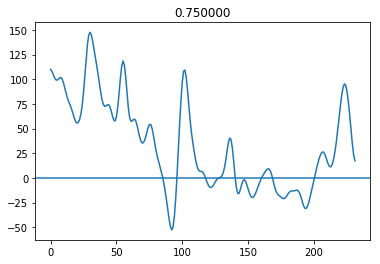

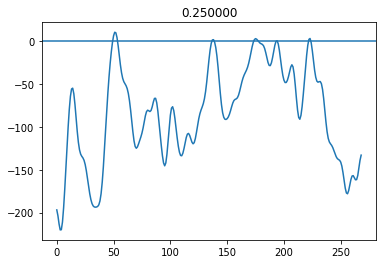

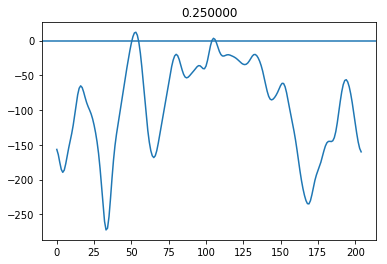

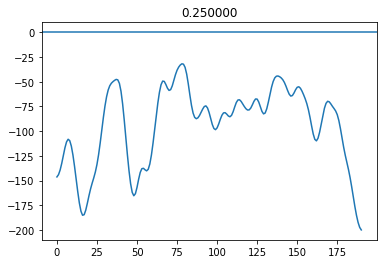

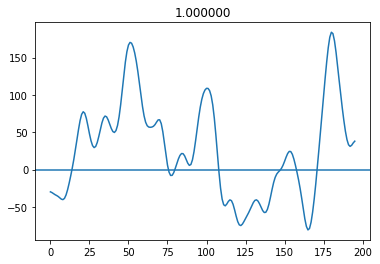

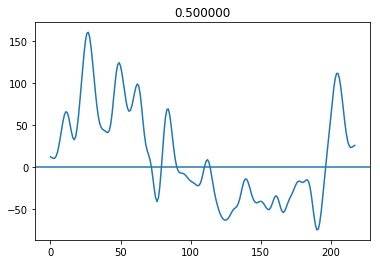

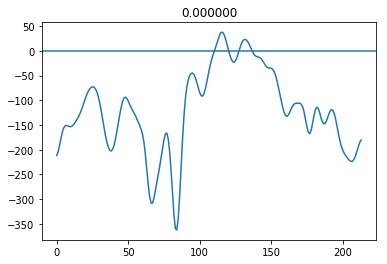

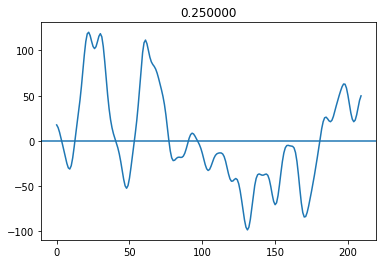

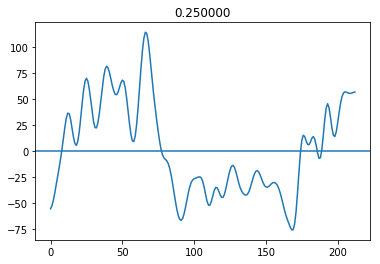

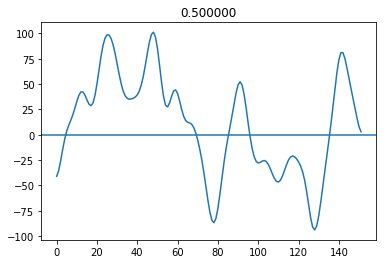

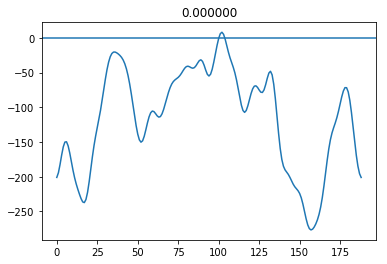

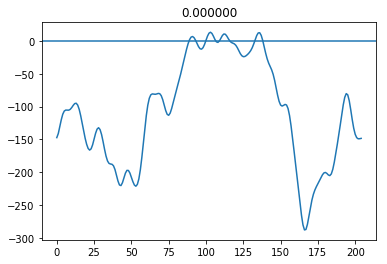

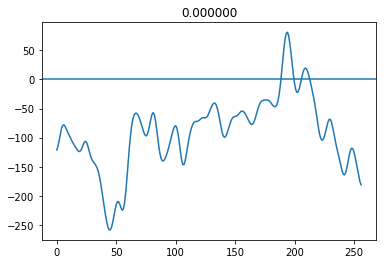

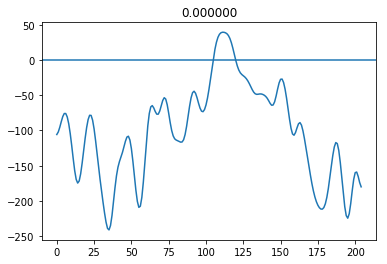

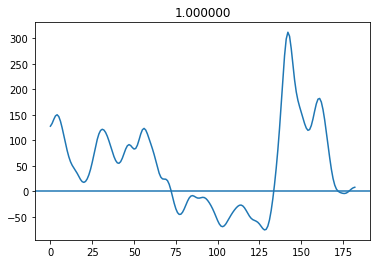

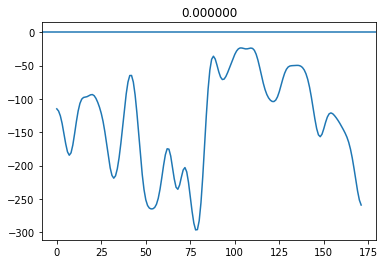

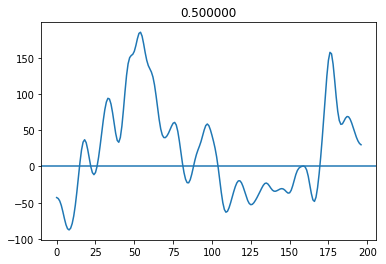

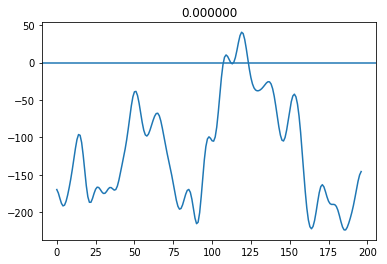

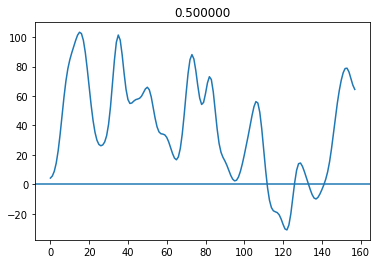

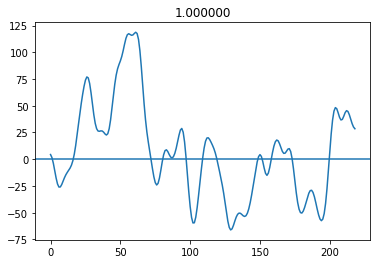

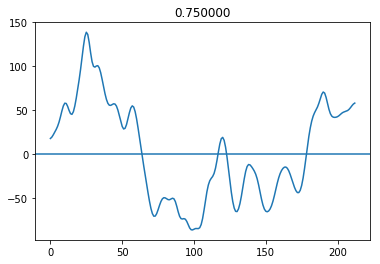

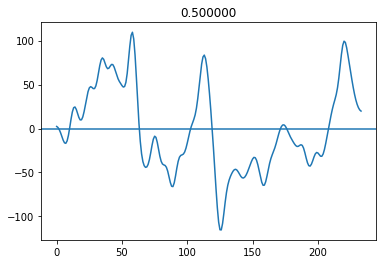

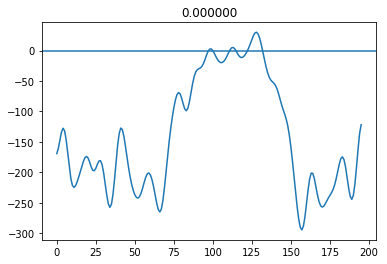

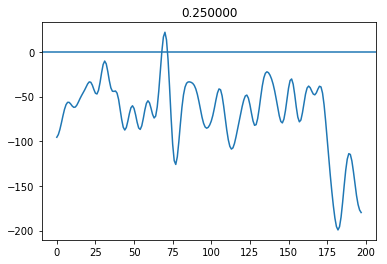

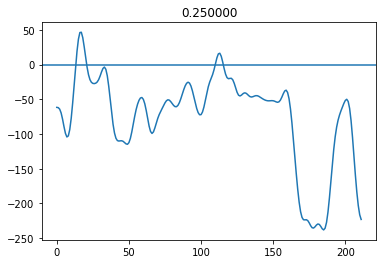

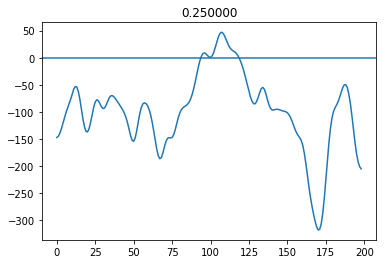

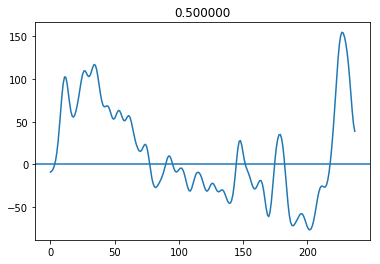

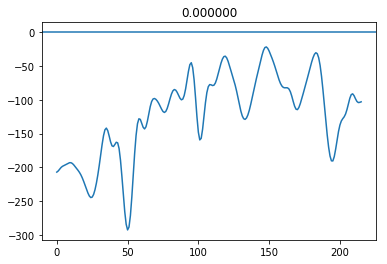

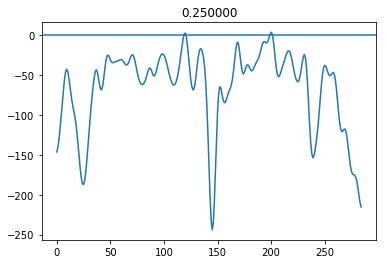

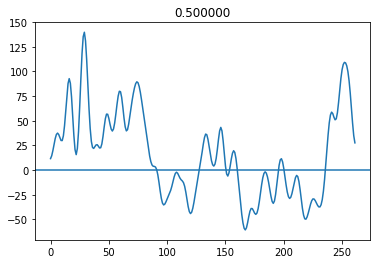

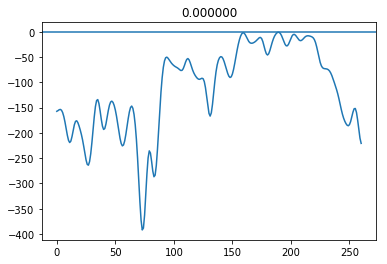

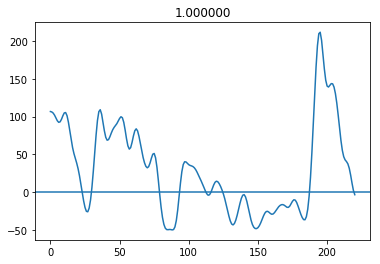

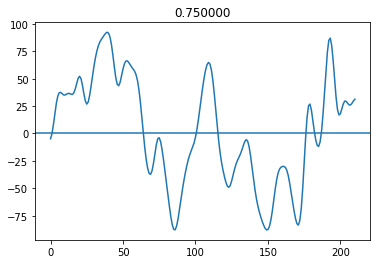

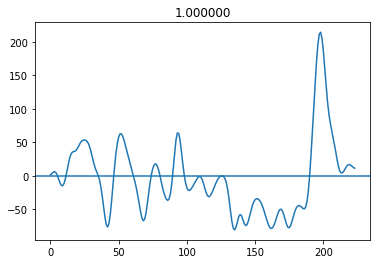

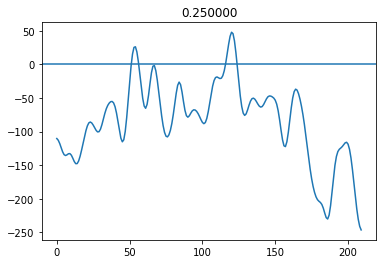

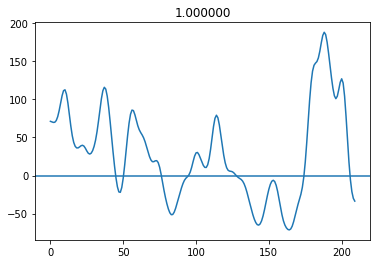

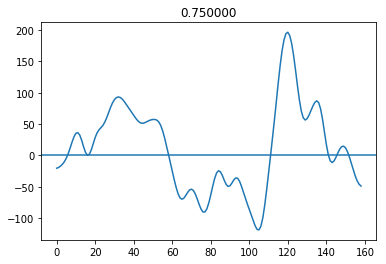

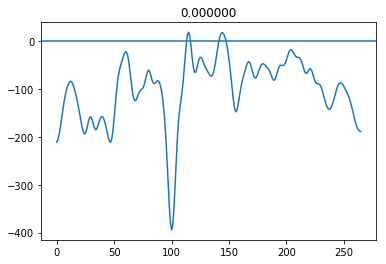

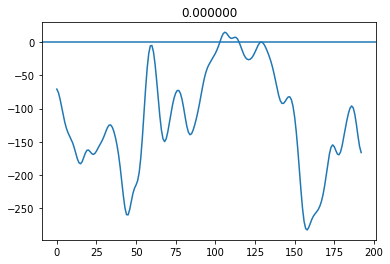

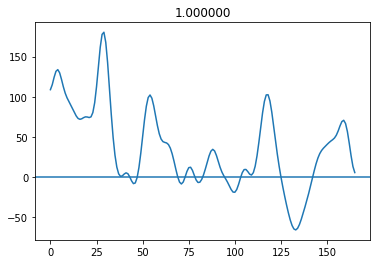

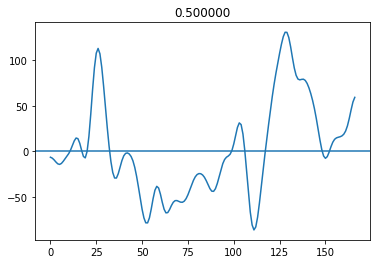

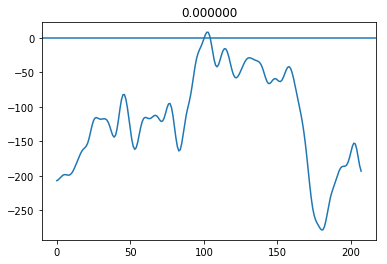

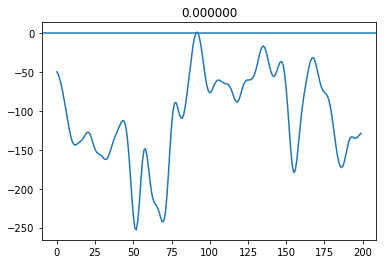

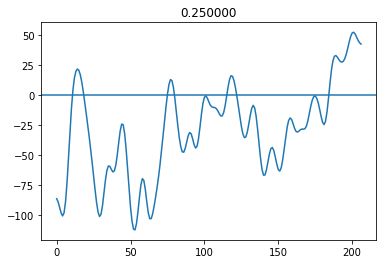

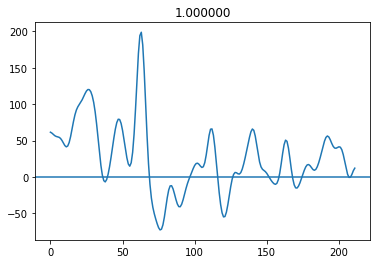

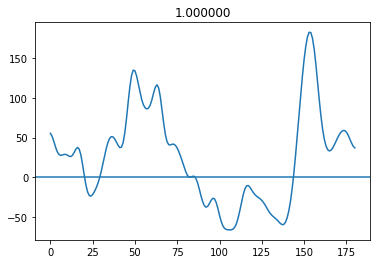

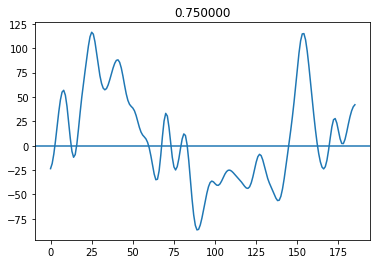

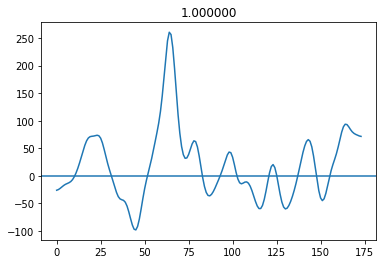

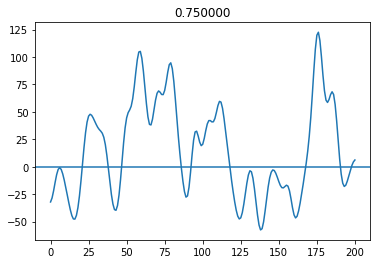

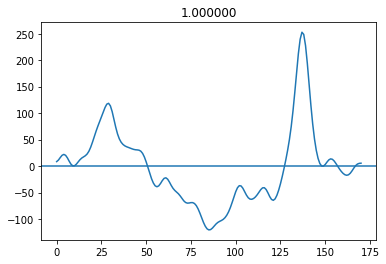

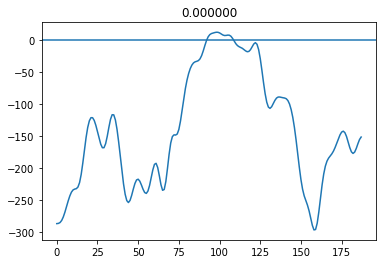

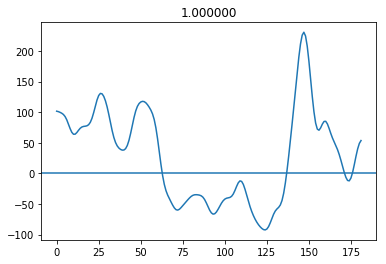

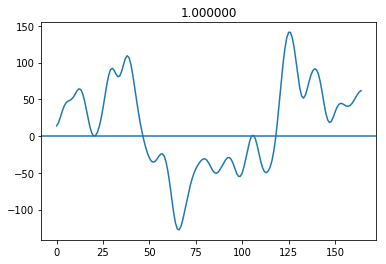

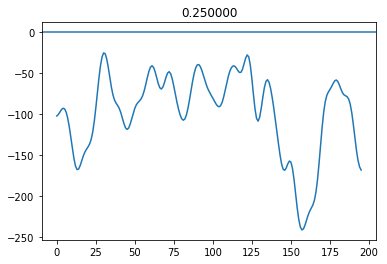

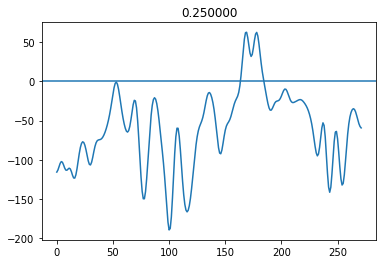

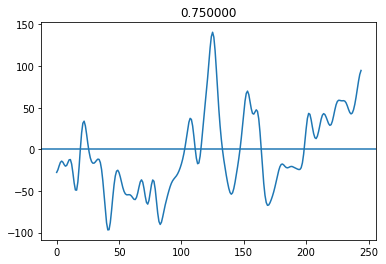

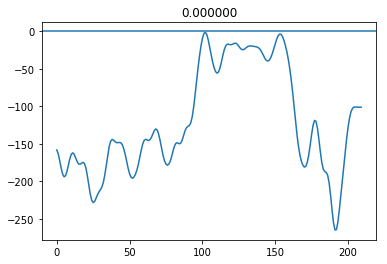

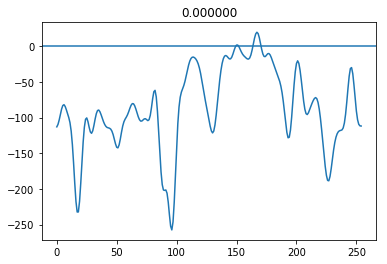

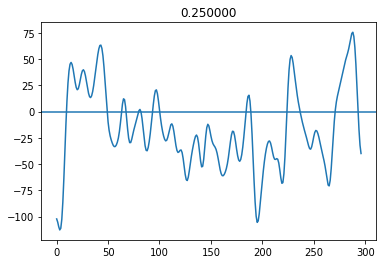

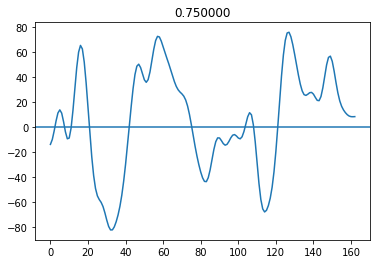

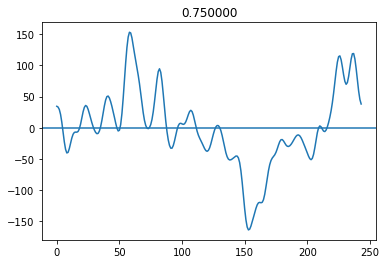

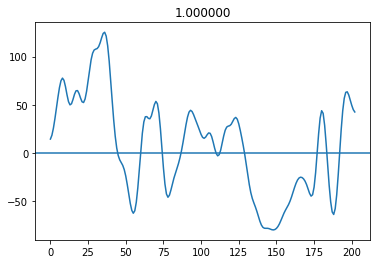

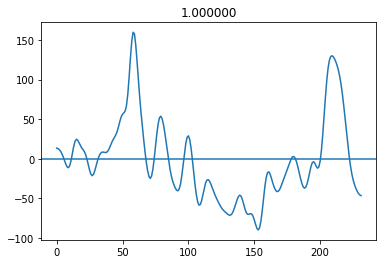

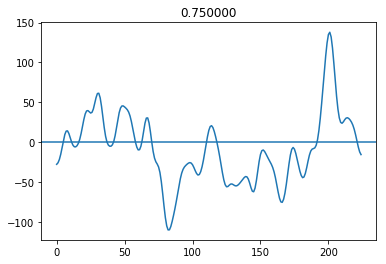

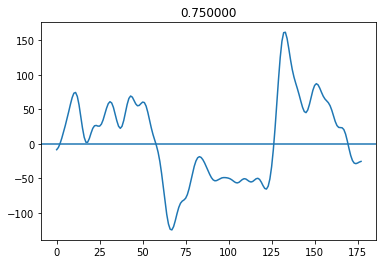

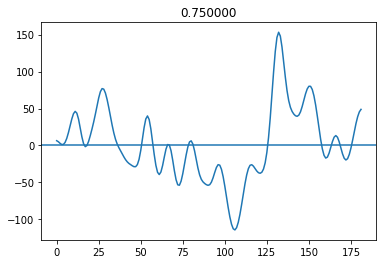

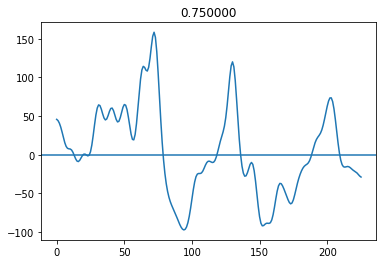

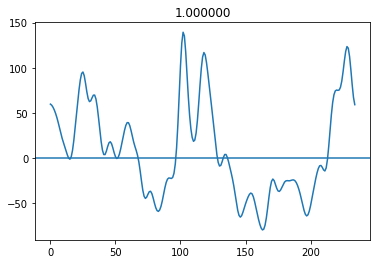

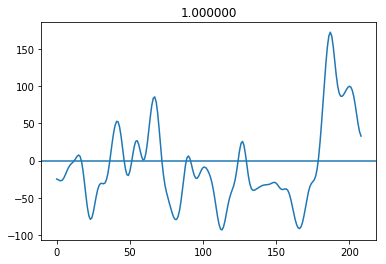

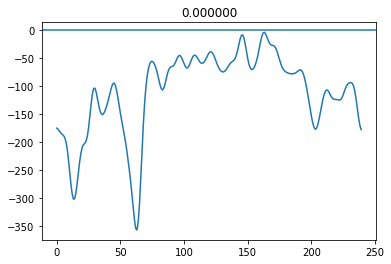

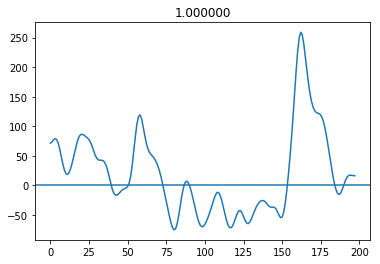

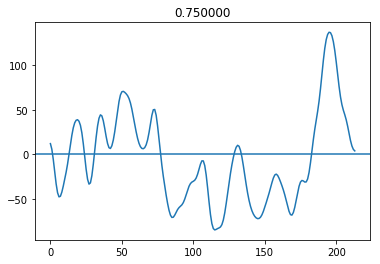

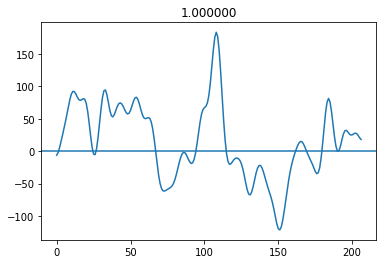

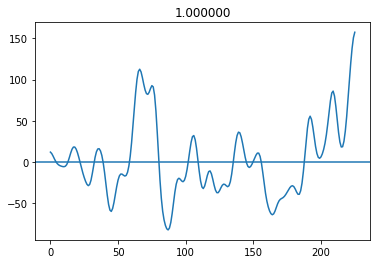

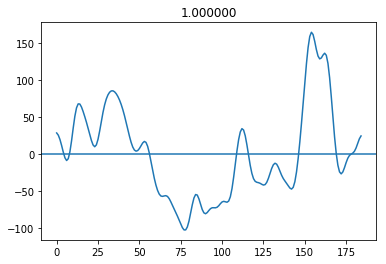

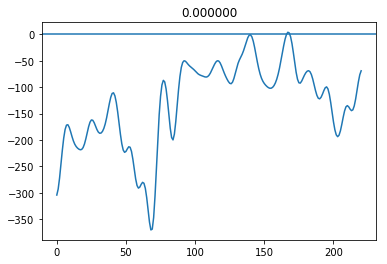

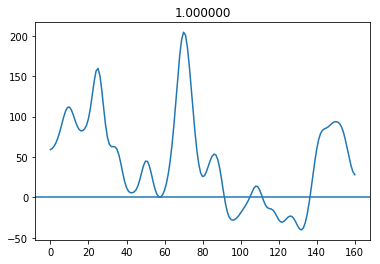

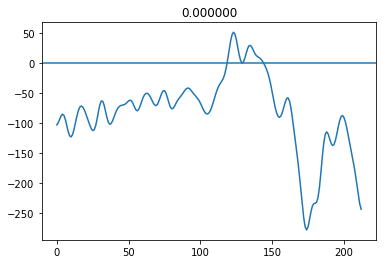

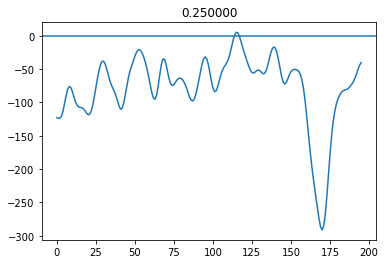

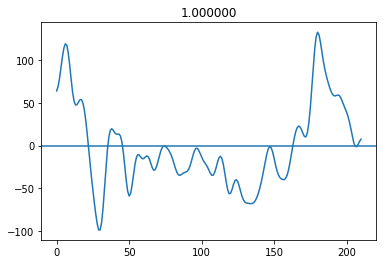

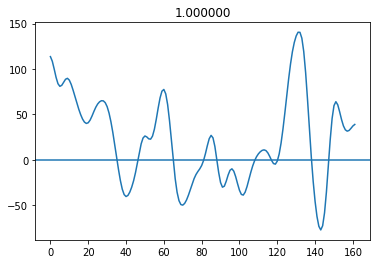

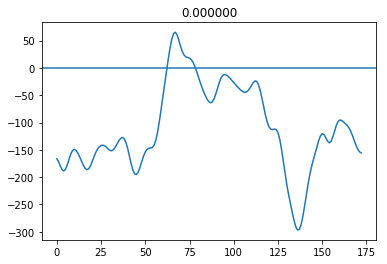

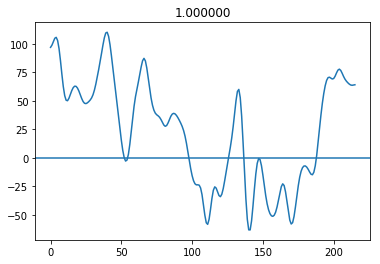

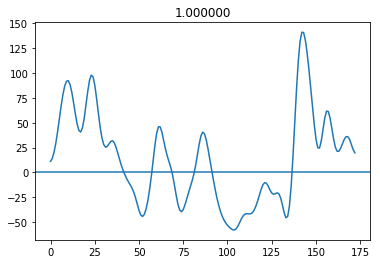

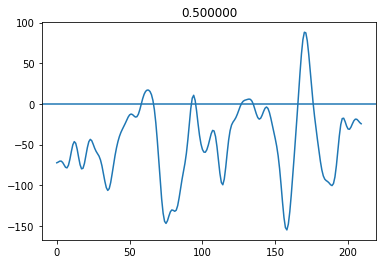

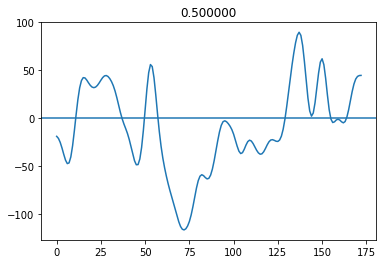

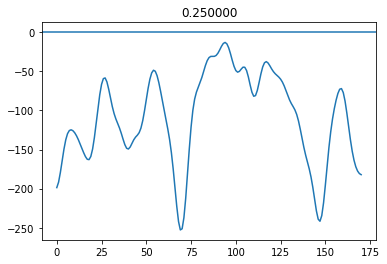

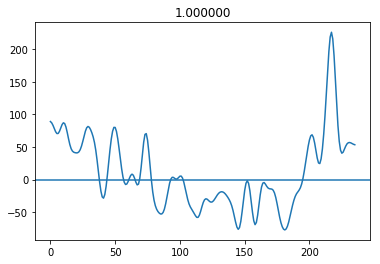

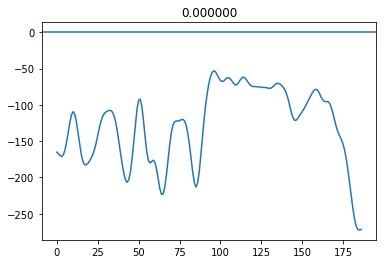

In [50]:
for i,(start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
    f,ax = plt.subplots()
    ax.plot(np.arange(stop-1-start),sp.ndimage.gaussian_filter1d(Maxis[start:stop-1,0],3))
#     ax.plot(np.arange(stop-1-start),np.cumsum(Maxis[start:stop-1,0]))
    ax.set_title("%f" % trial_info['morphs'][i])
    ax.axhline(0,xmin=0,xmax=stop-1-start)